# Import libraries 

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Load dataset

In [2]:
X, y = load_breast_cancer(return_X_y = True)

# See labels for dataset

In [3]:
list(np.unique(y))

[0, 1]

# Checking how many samples are 0 (malignant) and 1 (benign)

In [4]:
print("Total samples:", len(y))
print("Samples classified as malignant (0):", len(y) - sum(y))
print("Samples classified as benign (1):", sum(y))

Total samples: 569
Samples classified as malignant (0): 212
Samples classified as benign (1): 357


# Instantiate model for classification (Logistic Regression)

In [5]:
clf = LogisticRegression(max_iter = 10000)

# 5-fold cross-validation will be used

In [6]:
number_of_splits = 5
kf = KFold(n_splits = number_of_splits, shuffle = True, random_state = 2021)

# 5-fold Cross Validation to get average accuracy and F1 score for the model

In [7]:
fold_value = 1
accuracy_list = []
f1_score_list = []
for train_index, test_index in kf.split(X):
    
    start = time.time()
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train, y_train)
    accuracy_list.append(accuracy_score(clf.predict(X_test), y_test))
    f1_score_list.append(f1_score(clf.predict(X_test), y_test, pos_label = 1)) #positive label is set to 1 for simplicity
    
    end = time.time()
    print("Fold", fold_value, "/", number_of_splits, "completed")
    print("Time elapsed for training of current fold:", end-start, "seconds\n")
    fold_value = fold_value + 1

Fold 1 / 5 completed
Time elapsed for training of current fold: 0.5513336658477783 seconds

Fold 2 / 5 completed
Time elapsed for training of current fold: 0.6137781143188477 seconds

Fold 3 / 5 completed
Time elapsed for training of current fold: 0.6976301670074463 seconds

Fold 4 / 5 completed
Time elapsed for training of current fold: 0.7067952156066895 seconds

Fold 5 / 5 completed
Time elapsed for training of current fold: 0.5600590705871582 seconds



# Accuracy Performance

In [8]:
print(accuracy_list)

[0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9380530973451328]


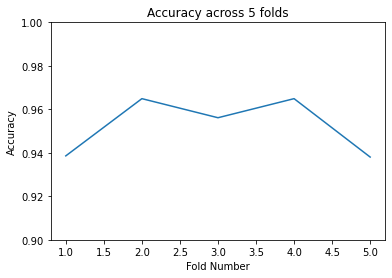

In [9]:
plt.figure()
plt.plot(range(1, number_of_splits + 1), accuracy_list);
plt.title("Accuracy across " + str(number_of_splits) + " folds")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1)
plt.show();

In [10]:
print("Average accuracy:", np.mean(accuracy_list))

Average accuracy: 0.9525229001707809


# F1 Score Performance

In [11]:
print(f1_score_list)

[0.9523809523809524, 0.9714285714285714, 0.9640287769784173, 0.9733333333333334, 0.9517241379310345]


[0.9523809523809524, 0.9714285714285714, 0.9640287769784173, 0.9733333333333334, 0.9517241379310345]


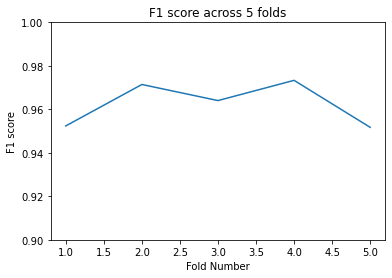

In [12]:
print(f1_score_list)
plt.figure()
plt.plot(range(1, number_of_splits + 1), f1_score_list)
plt.title("F1 score across " + str(number_of_splits) + " folds")
plt.xlabel("Fold Number")
plt.ylabel("F1 score")
plt.ylim(0.9, 1)
plt.show();

In [13]:
print("Average F1-score for class 1 as positive:", np.mean(f1_score_list))

Average F1-score for class 1 as positive: 0.9625791544104617
